In [50]:
import numpy as np
import random 
import mne
import pandas as pd
import os
from PIL import Image, ImageColor

## Experiment Code helpers

##### Image processing

In [106]:
# Finding the perfect color for the stimuli
path = 'stimuli/'
blue_house = Image.open(os.path.join(path,'house_blue.bmp'))
red_house = Image.open(os.path.join(path,'house_red.bmp'))
red_face = Image.open(os.path.join(path,'face_red.bmp'))
pixels = blue_house.load()
width, height = blue_house.size
pixel_values = list(blue_house.getdata())
pixels_redhouse = list(red_house.getdata())

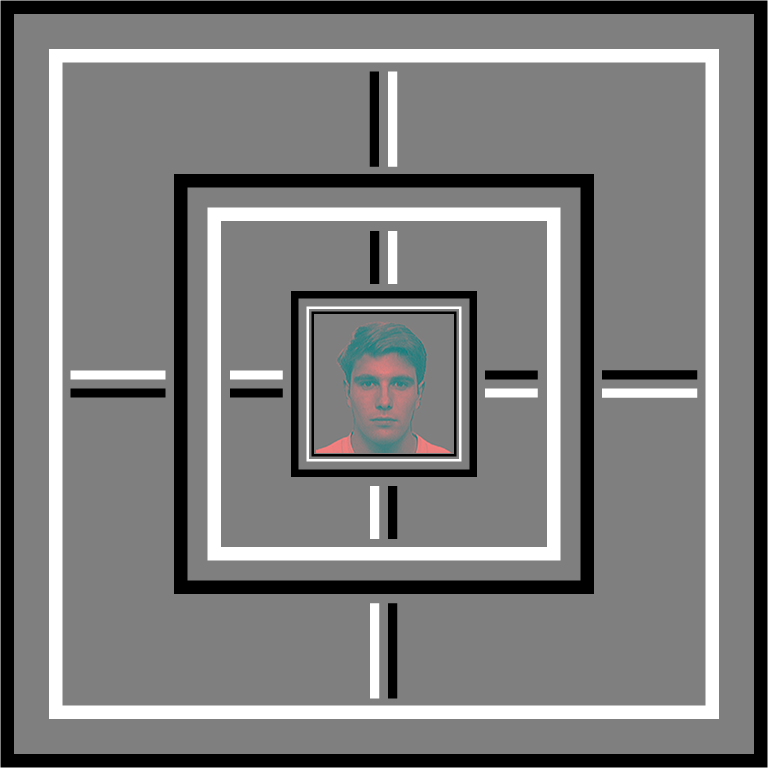

In [112]:
red_face

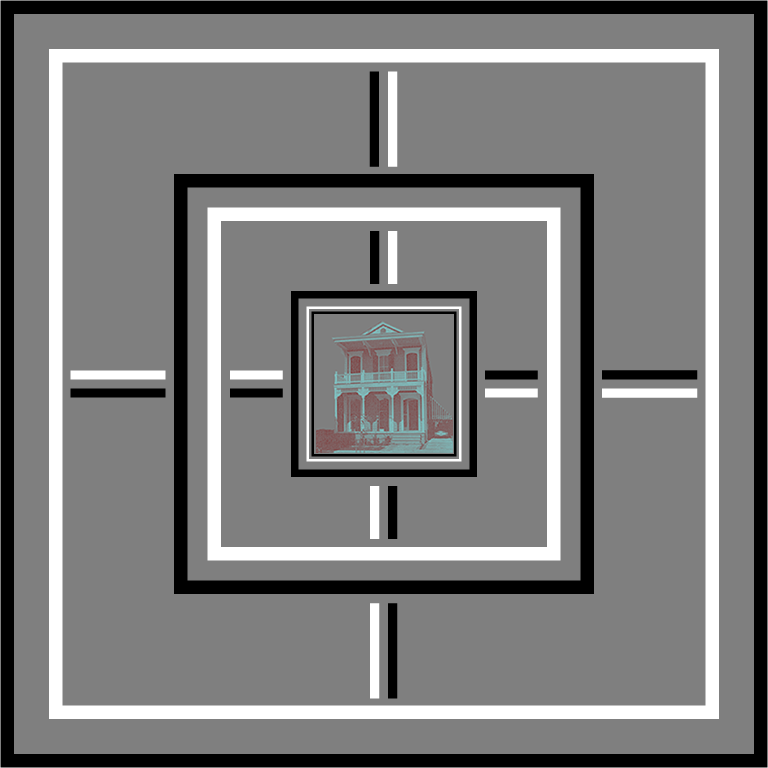

In [49]:
blue_house

In [ ]:
# the value of the background of the face is 128 instead of 127. This should not effect 
# the perception of the other eye though, since it is only red. 

In [116]:
values_bluehouse = np.asarray(red_face)
shape = image_arr.shape
changed_colour = values_bluehouse.copy()

# change the R value for all positions where the values are not equal!
for i, row in enumerate(values_bluehouse):
    for j, column in enumerate(row):
        if (column[0]!=column[1]) or (column[1]!=column[2]):
            #if column[0]==128:
                #changed_colour[i, j] = [27, 27, 27]
            #print(column)
            #print("index:", i, j)
            # use the index to change the value 
            changed_colour[i, j] = values_bluehouse[i , j] + [0, 2, 2]

In [117]:
# show how the changed image looks like
im2 = Image.fromarray((np.array(changed_colour, dtype='uint8')).reshape(shape))
im2.show()

In [ ]:
# now find out the size of the stimulus
# in pixels: 316:450 - 452:452



##### Jittering

In [2]:
# Computing the number of switches in the unabiguous trials
total_duration = 120
nr_switches = 9

assert total_duration  >= nr_switches >= 1

In [32]:
# compute how long one trial would take in an equal split
equal_duration = total_duration/nr_switches+1

# draw jitters for every switch
stdv = 1.5
jitter_list = []
previous_jitter = 0
total_time = []
for i in range(nr_switches-1):
    jitter = np.random.normal()
    trial_time = equal_duration + jitter
    print("jitter", jitter, "trial time", trial_time)
    total_time.append(trial_time)
    
print('total duration ', np.array(total_time).sum())
durations_sum = np.array(total_time).sum()
duration_difference = total_duration - durations_sum
# append whats missing to the last trial
total_time.append(duration_difference)
print('total duration ', np.array(total_time).sum())

print(len(total_time))

jitter 0.38965216726271384 trial time 13.389652167262714
jitter -1.7231220060956403 trial time 11.27687799390436
jitter 2.142486232821596 trial time 15.142486232821597
jitter -0.49713575429595647 trial time 12.502864245704043
jitter 0.2585696989660023 trial time 13.258569698966003
jitter -1.0346086457913515 trial time 11.965391354208649
jitter -0.09537932784568665 trial time 12.904620672154314
jitter 1.7858234355260756 trial time 14.785823435526076
jitter 0.11647942629933596 trial time 13.116479426299335
total duration  118.34276522684709
total duration  120.0
10


### Behavioural data

In [38]:
# read in the tsv file
data = pd.read_csv('.\output_data\sub-001_ses-1_Logs20220202102818\sub-001_ses-1_events.tsv',sep='\t') 

In [65]:
data_rivalry = data.loc[data['block_type'] == 'rivalry']
# compute the average duration 
unique_rivalry_block = data_rivalry['trial_nr'].unique()
switch_times = []

for rivalry_block in unique_rivalry_block:
    block = data_rivalry.loc[data_rivalry['trial_nr'] == rivalry_block]

    for i in range(len(block['onset'])-1):
        # start with the second onset (which is the first button press/first switch)
        current_onset = block['onset'].iloc[i+1]
        previous_onset = block['onset'].iloc[i]
        
        # take the previous onset and compare it to the current to get the time between perception switch 
        switch_times.append(current_onset - previous_onset)
        
# Calculate mean and stdv 
switch_times_mean = np.array(switch_times).mean()
switch_times_std = np.array(switch_times).std()
print('MEAN duration between switches:', switch_times_mean)
print('STD of duration between switches:', switch_times_std)

MEAN duration between switches: 3.2096916714550123
STD of duration between switches: 1.2191978915356285


### Eyetracking data

In [34]:
# read in the data
file = "output_data\sub-999_ses-1_Logs\sub-999_ses-1.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from C:\Users\rosah\ownCloud\UniAmsterdam\Internship(s)\Research_Project_1_Spinoza\Code\Experiment\binocular_rivalry\output_data\sub-999_ses-1_Logs\sub-999_ses-1.edf...
EDF file detected


ValueError: invalid literal for int() with base 10: 'AMERA: E'